Libraries

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_log_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

Loading Data

In [ ]:

TRAIN = pd.read_csv("aba_train.csv")

TEST = pd.read_csv("aba_test.csv")

One hot encoding Training Sex variable

In [3]:
# One hot encoding Sex variable
TRAIN_NEW = pd.get_dummies(TRAIN, columns=['Sex'], drop_first=True)
TRAIN_NEW[['Sex_M', 'Sex_I']] = TRAIN_NEW[['Sex_M', 'Sex_I']].astype(int)


Regularization techniques Section: Ridge, Lasso, and ElasticNet

In [ ]:

X = TRAIN_NEW[['Shell weight', 'Height', 'Diameter', 'Length', 'Whole weight', 'Whole weight.1', 'Whole weight.2',
               'Sex_M', 'Sex_I']].values
y = TRAIN_NEW[['Rings']].values.ravel()





Splitting training data

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=8555)

Training Ridge, Lasso, and ElasticNet models

In [6]:
# Ridge Regression
ridge = Ridge()  
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_val)

# Lasso Regression
lasso = Lasso()  
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_val)

# ElasticNet Regression
elastic = ElasticNet()  
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_val)


Ridge, Lasso, and ElasticNet model coefficients 

In [7]:
feature_names = ['Shell weight', 'Height', 'Diameter', 'Length', 'Whole weight', 
                 'Whole weight.1', 'Whole weight.2', 'Sex_M', 'Sex_I']

ridge_coef = ridge.coef_.flatten()
lasso_coef = lasso.coef_.flatten()
elastic_coef = elastic.coef_.flatten()

# Ridge Coefficients
print("Ridge Coefficients:")
for name, coef in zip(feature_names, ridge.coef_):
    print(f"{name}: {coef:.4f}")

# Lasso Coefficients
print("\nLasso Coefficients:")
for name, coef in zip(feature_names, lasso.coef_):
    print(f"{name}: {coef:.4f}")

# ElasticNet Coefficients
print("\nElasticNet Coefficients:")
for name, coef in zip(feature_names, elastic.coef_):
    print(f"{name}: {coef:.4f}")


Ridge Coefficients:
Shell weight: 20.9174
Height: 20.0223
Diameter: 7.4438
Length: -1.5510
Whole weight: 3.6707
Whole weight.1: -15.5981
Whole weight.2: -6.7871
Sex_M: -0.0283
Sex_I: -0.7286

Lasso Coefficients:
Shell weight: 0.0000
Height: 0.0000
Diameter: 0.0000
Length: 0.0000
Whole weight: 0.0000
Whole weight.1: 0.0000
Whole weight.2: 0.0000
Sex_M: 0.0000
Sex_I: -0.0000

ElasticNet Coefficients:
Shell weight: 0.0000
Height: 0.0000
Diameter: 0.0000
Length: 0.0000
Whole weight: 0.5012
Whole weight.1: 0.0000
Whole weight.2: 0.0000
Sex_M: 0.0000
Sex_I: -0.3024


Equations For Each Model

In [8]:
feature_names = ['Shell weight', 'Height', 'Diameter', 'Length', 'Whole weight', 
                 'Whole weight.1', 'Whole weight.2', 'Sex_M', 'Sex_I']

ridge_coef = ridge.coef_.flatten()
lasso_coef = lasso.coef_.flatten()
elastic_coef = elastic.coef_.flatten()

# Adding Intercepts
ridge_intercept = ridge.intercept_
lasso_intercept = lasso.intercept_
elastic_intercept = elastic.intercept_

# Function to make equations a string
def build_formula(model_name, intercept, coefs, features):
    formula = f"{model_name}_Prediction = {intercept:.4f} "
    for coef, feature in zip(coefs, features):
        sign = "+" if coef >= 0 else "-"
        formula += f"{sign} {abs(coef):.4f}*{feature} "
    return formula

ridge_formula = build_formula("Ridge", ridge_intercept, ridge_coef, feature_names)
lasso_formula = build_formula("Lasso", lasso_intercept, lasso_coef, feature_names)
elastic_formula = build_formula("ElasticNet", elastic_intercept, elastic_coef, feature_names)

print("\nRidge Regression Formula:")
print(ridge_formula)

print("\nLasso Regression Formula:")
print(lasso_formula)

print("\nElasticNet Regression Formula:")
print(elastic_formula)



Ridge Regression Formula:
Ridge_Prediction = 3.9132 + 20.9174*Shell weight + 20.0223*Height + 7.4438*Diameter - 1.5510*Length + 3.6707*Whole weight - 15.5981*Whole weight.1 - 6.7871*Whole weight.2 - 0.0283*Sex_M - 0.7286*Sex_I 

Lasso Regression Formula:
Lasso_Prediction = 9.6877 + 0.0000*Shell weight + 0.0000*Height + 0.0000*Diameter + 0.0000*Length + 0.0000*Whole weight + 0.0000*Whole weight.1 + 0.0000*Whole weight.2 + 0.0000*Sex_M + 0.0000*Sex_I 

ElasticNet Regression Formula:
ElasticNet_Prediction = 9.4038 + 0.0000*Shell weight + 0.0000*Height + 0.0000*Diameter + 0.0000*Length + 0.5012*Whole weight + 0.0000*Whole weight.1 + 0.0000*Whole weight.2 + 0.0000*Sex_M - 0.3024*Sex_I 


Evaluation of Model Using R-Squared and RMSE. Note,ridge regression is best (highest R-squared and lowest RMSE)

In [9]:
def evaluate_model(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{name} -> R^2: {r2:.4f}, RMSE: {rmse:.4f}")

# Evaluate all models R-Squared and RMSE
evaluate_model(y_val, y_pred_ridge, "Ridge")
evaluate_model(y_val, y_pred_lasso, "Lasso")
evaluate_model(y_val, y_pred_elastic, "ElasticNet")


Ridge -> R^2: 0.6041, RMSE: 2.0010
Lasso -> R^2: -0.0002, RMSE: 3.1806
ElasticNet -> R^2: 0.1229, RMSE: 2.9785


Evaluation of Each Model Using R-Squared and RMSLE. Note, ridge regression is best (highest R-squared and lowest RMSLE)

In [ ]:

def evaluate_model_rmsle(y_true, y_pred, name):
    y_pred = np.maximum(0, y_pred) 
    rmsle = np.sqrt(mean_squared_log_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} -> R^2: {r2:.4f}, RMSLE: {rmsle:.4f}")


# Evaluate all models R-Squared and RMSLE
evaluate_model_rmsle(y_val, y_pred_ridge, "Ridge")
evaluate_model_rmsle(y_val, y_pred_lasso, "Lasso")
evaluate_model_rmsle(y_val, y_pred_elastic, "ElasticNet")


Ridge -> R^2: 0.6041, RMSLE: 0.1631
Lasso -> R^2: -0.0002, RMSLE: 0.2881
ElasticNet -> R^2: 0.1229, RMSLE: 0.2672


One Hot Encoding Test Data Sex Variable For Predictions

In [11]:

TEST_NEW = pd.get_dummies(TEST, columns=['Sex'], drop_first=True)
TEST_NEW[['Sex_M', 'Sex_I']] = TEST_NEW[['Sex_M', 'Sex_I']].astype(int)



Application of Ridge, Lasso, and ElasticNet Predictions. Note, ridge regression used for its performance metrics. Note, negative ring predictions are set to 0 rings for practical reasons. Note, rings output corresponds to ridge regression while Lasso and ElasticNet are explicitly stated in column names.

In [12]:
X_test = TEST_NEW[['Shell weight', 'Height', 'Diameter', 'Length', 'Whole weight', 
                   'Whole weight.1', 'Whole weight.2', 'Sex_M', 'Sex_I']].values

# any negative values will be 0
TEST_NEW['Rings'] = np.maximum(ridge.predict(X_test).round().astype(int),0) #this will be the ridge regression
TEST_NEW['Rings_Lasso'] = np.maximum(lasso.predict(X_test).round().astype(int),0)
TEST_NEW['Rings_ElasticNet'] = np.maximum(elastic.predict(X_test).round().astype(int),0)


print(TEST_NEW.head())

#Code to create the submission file for ridge regression model commented out
#TEST_NEW = TEST_NEW.iloc[:, [0, 10]]
#TEST_NEW.to_csv("abalone_submission_ridgereg.csv", index=False)



      id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   0.645     0.475   0.155        1.2380          0.6185   
1  90616   0.580     0.460   0.160        0.9830          0.4785   
2  90617   0.560     0.420   0.140        0.8395          0.3525   
3  90618   0.570     0.490   0.145        0.8740          0.3525   
4  90619   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  Sex_I  Sex_M  Rings  Rings_Lasso  \
0          0.3125        0.3005      0      1      9           10   
1          0.2195        0.2750      0      1     10           10   
2          0.1845        0.2405      0      1     10           10   
3          0.1865        0.2350      0      1     11           10   
4          0.0670        0.1050      1      0      8           10   

   Rings_ElasticNet  
0                10  
1                10  
2                10  
3                10  
4                 9  


Assumption Evaluation for Ridge Regression

Linearity: Failed given non-linear trends of rings vs predictors.

Homoscedastic Variance: Failed since fitted values decrease as residual increase pattern in residual vs fitted plot.

Independence of Error: Passed given no indication of time-order or sequential data and Durbin Watson test stat of 2.

Optional Assumption Below... Only Needed for Inference Not Soley Prediction

Normality of Residuals: Fails due to deviation from normal "red" line in QQ-Plot.

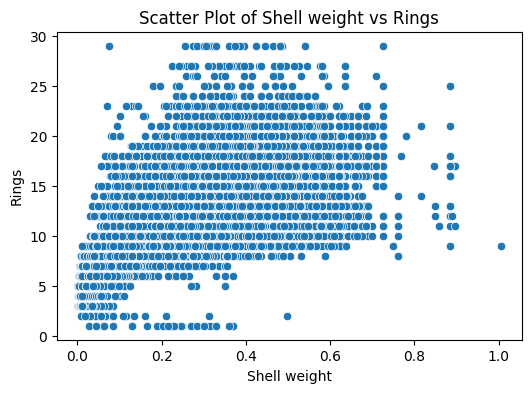

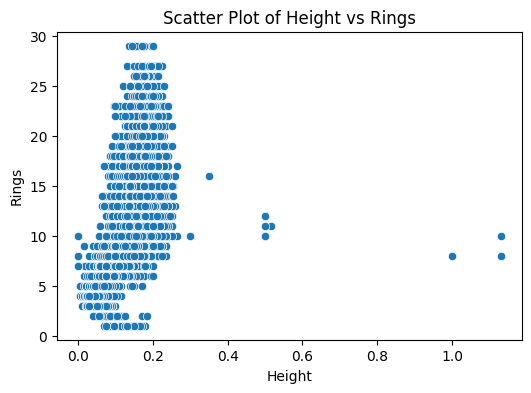

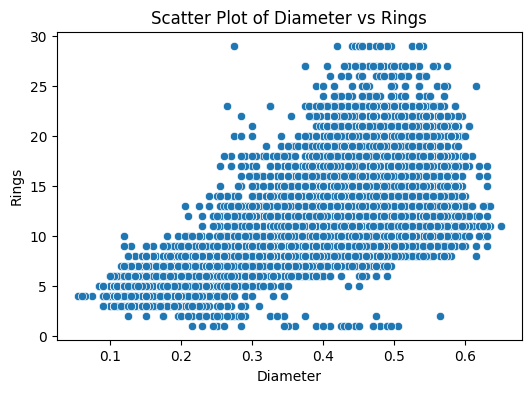

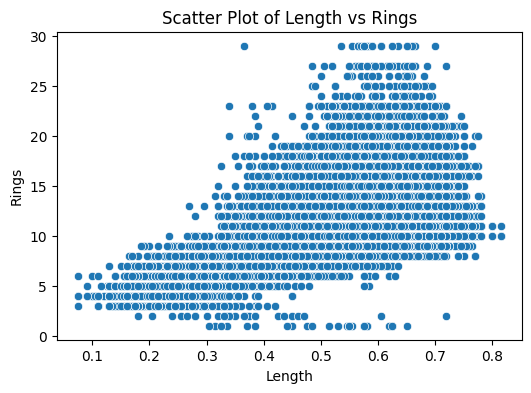

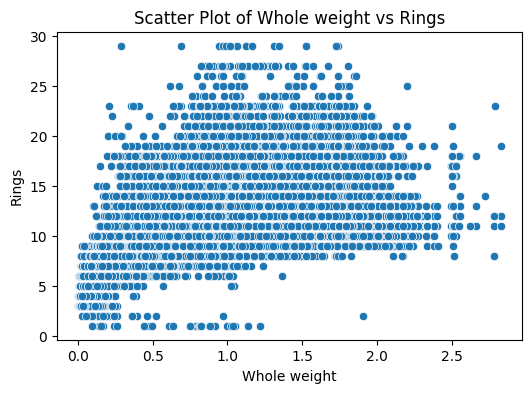

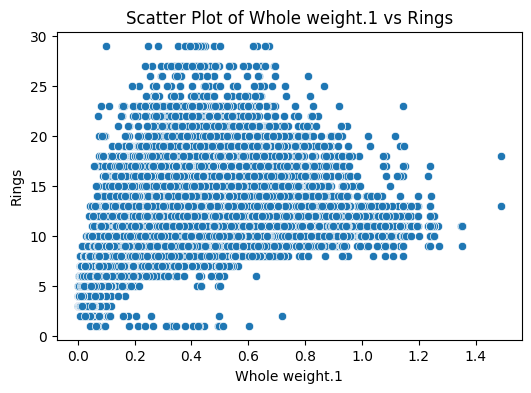

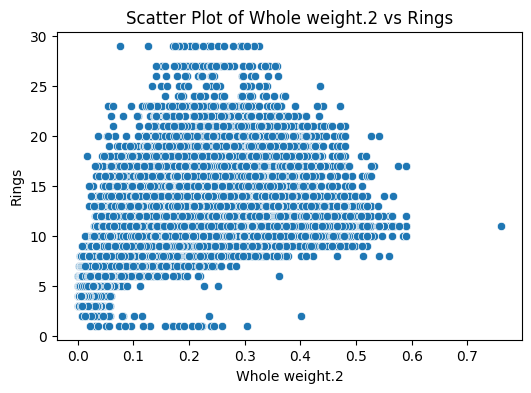

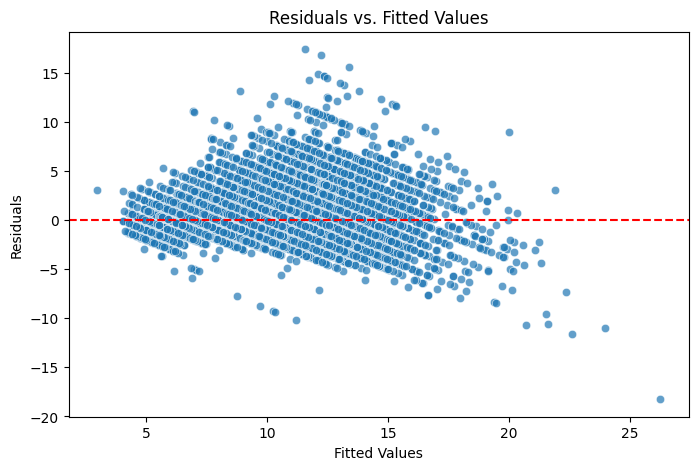

Durbin-Watson statistic: 2.0157


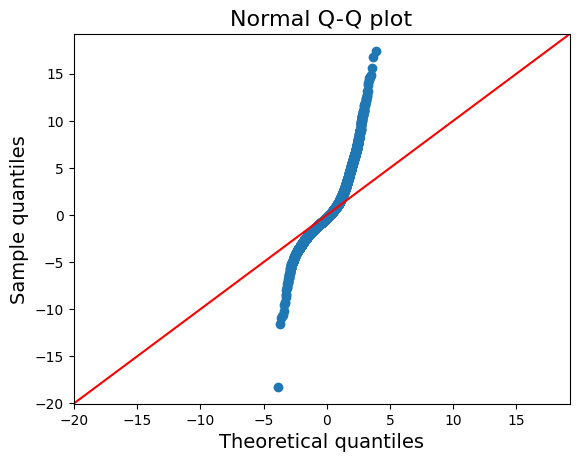

In [ ]:
#Linearity Assumption

# predictors and variable of interest
X = TRAIN_NEW[['Shell weight', 'Height', 'Diameter', 'Length', 
               'Whole weight', 'Whole weight.1', 'Whole weight.2']]  
y = TRAIN_NEW['Rings']

# scatter plots
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=TRAIN_NEW[col], y=y)
    plt.xlabel(col)
    plt.ylabel('Rings')
    plt.title(f'Scatter Plot of {col} vs Rings')
    plt.show()

#Equal Variance Assumption
fitted_values = ridge.predict(X_val)  
residuals = y_val - fitted_values

# Residuals vs. Fitted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

#Independent Error Durbin Watson

# Durbin-Watson test
dw_statistic = durbin_watson(residuals)

print(f'Durbin-Watson statistic: {dw_statistic:.4f}')

#Residual QQ-plot, not necessary for predictions, but important for inference
#QQ-plot for Residuals
p=sm.qqplot(residuals,line='45')
plt.title('Normal Q-Q plot', fontsize=16);
plt.xlabel('Theoretical quantiles', fontsize=14);
plt.ylabel('Sample quantiles', fontsize=14);

Principal Comonents Regression: reading in data

In [ ]:

TRAIN = pd.read_csv("aba_train.csv")
TEST = pd.read_csv("aba_test.csv")

# One hot encoding training Sex variable
TRAIN_NEW = pd.get_dummies(TRAIN, columns=['Sex'], drop_first=True)
TRAIN_NEW[['Sex_M', 'Sex_I']] = TRAIN_NEW[['Sex_M', 'Sex_I']].astype(int)

#One hot encoding testing sex variable
TEST_NEW = pd.get_dummies(TEST, columns=['Sex'], drop_first=True)
TEST_NEW[['Sex_M', 'Sex_I']] = TEST_NEW[['Sex_M', 'Sex_I']].astype(int)

print(TRAIN_NEW.head())
print(TEST_NEW.head())



   id  Length  Diameter  Height  Whole weight  Whole weight.1  Whole weight.2  \
0   0   0.550     0.430   0.150        0.7715          0.3285          0.1465   
1   1   0.630     0.490   0.145        1.1300          0.4580          0.2765   
2   2   0.160     0.110   0.025        0.0210          0.0055          0.0030   
3   3   0.595     0.475   0.150        0.9145          0.3755          0.2055   
4   4   0.555     0.425   0.130        0.7820          0.3695          0.1600   

   Shell weight  Rings  Sex_I  Sex_M  
0        0.2400     11      0      0  
1        0.3200     11      0      0  
2        0.0050      6      1      0  
3        0.2500     10      0      1  
4        0.1975      9      1      0  
      id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   0.645     0.475   0.155        1.2380          0.6185   
1  90616   0.580     0.460   0.160        0.9830          0.4785   
2  90617   0.560     0.420   0.140        0.8395          0.3525   
3  9061

Modeling Variables (X) and Variable of Interest (y)

In [15]:
X = TRAIN_NEW[['Shell weight', 'Height', 'Diameter', 'Length', 'Whole weight', 'Whole weight.1', 'Whole weight.2',
               'Sex_M', 'Sex_I']].values
y = TRAIN_NEW[['Rings']].values

Splitting the Training Data

In [ ]:

# Splitting data (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=8555)

Standardizing Predictors

In [17]:
# Standardize variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)  



Evaluation of Components:

3 compents explain 95.1% of variation.

In [18]:
# Applying PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)
print("Cumulative explained variance:", np.cumsum(explained_variance))

Explained variance ratio: [0.79807222 0.11502998 0.03776866 0.02099062 0.01283952 0.00801525
 0.00496929 0.00120944 0.00110501]
Cumulative explained variance: [0.79807222 0.91310221 0.95087087 0.97186149 0.98470101 0.99271626
 0.99768555 0.99889499 1.        ]


Using First 3 Components as They Explain 0.951 or 95.1% of Variance

In [19]:
# Keep first 3 components 
n_components = 3
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

Fitting Linear Regression with Principal Components:

Worse RMSLE and R-Squared compared to ridge regression model.

In [20]:
# Linear regression for 3 principal components
lr = LinearRegression()
lr.fit(X_train_pca, y_train)

y_pred_pcr = lr.predict(X_val_pca)

rmsle_pcr = np.sqrt(mean_squared_log_error(y_val, y_pred_pcr))
print(f'PCR RMSLE: {rmsle_pcr:.4f}')

r2_pcr = r2_score(y_val, y_pred_pcr)
print(f'PCR R-squared: {r2_pcr:.4f}')

PCR RMSLE: 0.1942
PCR R-squared: 0.4211


Prinicpal Component Regression Equation

In [ ]:
final_coefficients = np.dot(lr.coef_.ravel(), pca.components_)

feature_names = ['Shell weight', 'Height', 'Diameter', 'Length', 'Whole weight',
                 'Whole weight.1', 'Whole weight.2', 'Sex_M', 'Sex_I']

# Print final equation
intercept = lr.intercept_.item()  

equation = f"{intercept:.4f} + " + " + ".join(
    [f"{coef:.4f} * {name}" for name, coef in zip(feature_names, final_coefficients)]
)
print("\nFinal PCR Regression Equation:\n", equation)



Final PCR Regression Equation:
 9.6877 + 0.2481 * Shell weight + 0.2729 * Height + 0.2634 * Diameter + 0.2543 * Length + 0.2270 * Whole weight + 0.1881 * Whole weight.1 + 0.2314 * Whole weight.2 + -0.1505 * Sex_M + -0.6775 * Sex_I


Applying to Test Data for Ring Predictions

In [22]:
# Standardize X_test using the same scale used on X_train
X_test_scaled = scaler.transform(X_test)  

# PCA transformation using the same PCA model fitted to X_train
X_test_pca = pca.transform(X_test_scaled)  

# Predictions with PCR model
# Negative predictions rounded to 0
TEST_NEW['Rings'] = np.maximum(lr.predict(X_test_pca).round().astype(int), 0)

print(TEST_NEW.head())

#Code to create the submission file for PCR model commented out
#TEST_NEW = TEST_NEW.iloc[:, [0, -1]]
#TEST_NEW.to_csv("abalone_submission_PCR.csv", index=False)

      id  Length  Diameter  Height  Whole weight  Whole weight.1  \
0  90615   0.645     0.475   0.155        1.2380          0.6185   
1  90616   0.580     0.460   0.160        0.9830          0.4785   
2  90617   0.560     0.420   0.140        0.8395          0.3525   
3  90618   0.570     0.490   0.145        0.8740          0.3525   
4  90619   0.415     0.325   0.110        0.3580          0.1575   

   Whole weight.2  Shell weight  Sex_I  Sex_M  Rings  
0          0.3125        0.3005      0      1     12  
1          0.2195        0.2750      0      1     11  
2          0.1845        0.2405      0      1     10  
3          0.1865        0.2350      0      1     11  
4          0.0670        0.1050      1      0      7  


Assumption Evaluation: 

Linearity of Principal Components with Rings: Failed due to scatter plots showing non-linear trends between rings and components.

Homoscedastic Variance: Passed due to no obvious pattern in residual vs fitted plot. 

Independence of Error: Passed due to no indication of time-order or sequential data and Durbin Watson test stat of 2.

Optional Assumption Below... Only Needed for Inference Not Soley Prediction

Normality of errors: Failed due to deviation from normality "red" line. 





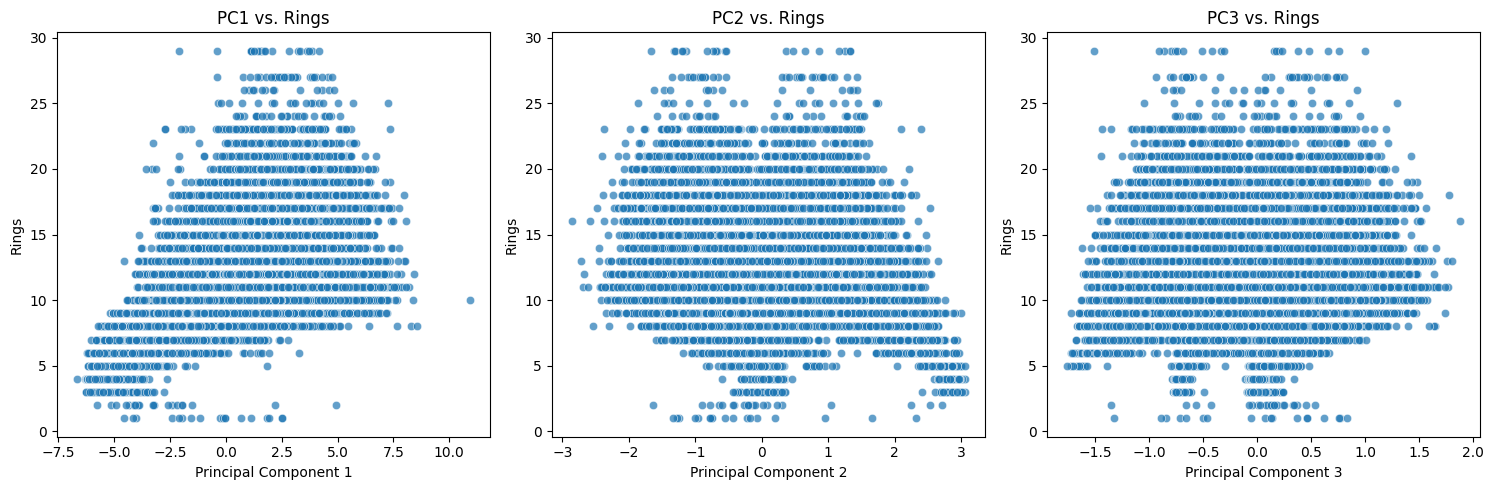

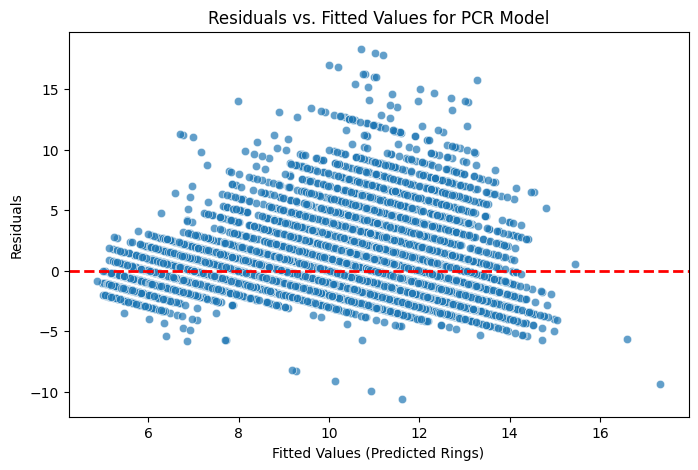

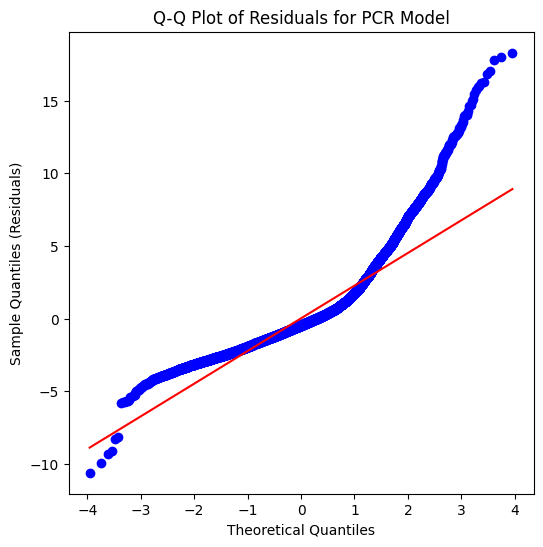

Durbin-Watson statistic: 2.0232


In [ ]:
#Linearity

# Visualize 3 components
num_components = X_train_pca.shape[1]

# Plot PCs vs. Rings
plt.figure(figsize=(15, 5))  

for i in range(num_components):
    plt.subplot(1, num_components, i + 1)  
    sns.scatterplot(x=X_train_pca[:, i], y=y_train.flatten(), alpha=0.7)
    plt.xlabel(f'Principal Component {i+1}')
    plt.ylabel('Rings')
    plt.title(f'PC{i+1} vs. Rings')

plt.tight_layout()
plt.show()

#Equal Variance
# Residuals and fitted values
residuals = y_val.flatten() - y_pred_pcr.flatten()  
fitted_values = y_pred_pcr.flatten()

# Residuals vs. Fitted Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Horizontal line at zero
plt.xlabel('Fitted Values (Predicted Rings)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values for PCR Model')
plt.show()


# Q-Q Plot of Residuals
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals for PCR Model')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles (Residuals)')
plt.show()

#Independence of error
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_statistic:.4f}')

